In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify 
from wordcloud import WordCloud

plt.style.use('seaborn-v0_8')

jobs = pd.read_csv('../data/salaries.csv')

In [56]:
key_words = ('Data','Machine Learning', 'Analyst', 'Analysis', 'Analytics','Bussiness Intelligence', 'AI', 'BI', 'Decision Scientist','Computer Vision', 'NLP', 'ML', 'Artificial Intelligence','Deep Learning', 'ETL')

jobs = jobs[jobs['job_title'].str.contains('|'.join(key_words))]


jobs = jobs[(jobs['work_year'] != 2025) & (jobs['experience_level'] != 'EX')]

jobs

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
4544,2024,MI,FT,Business Analyst,25860,USD,25860,IN,100,UA,M
14516,2024,EN,FT,Data Quality Specialist,16100,EUR,17888,PT,100,US,L
15836,2024,SE,FT,Data Developer,131958,USD,131958,US,0,US,M
15837,2024,SE,FT,Data Developer,79175,USD,79175,US,0,US,M
15840,2024,EN,FT,Analytics Engineer,720000,USD,720000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
88579,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
88580,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
88581,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
88582,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


### **CONTEO DE EMPLEOS**

C:\Users\danie\AppData\Local\Temp\ipykernel_21180\917612619.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=jobs, y='job_title', order=jobs['job_title'].value_counts().head(10).index, palette='viridis')


<Axes: xlabel='count', ylabel='job_title'>

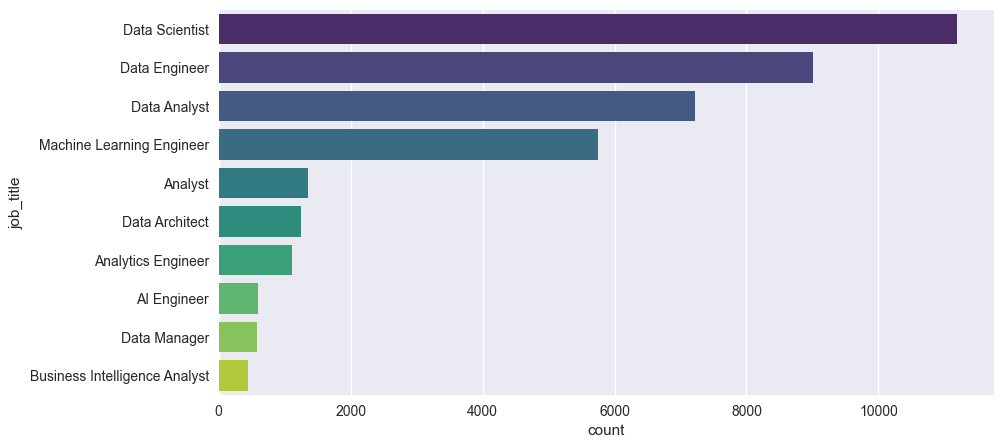

In [57]:

plt.figure(figsize=(10,5))
sns.countplot(data=jobs, y='job_title', order=jobs['job_title'].value_counts().head(10).index, palette='viridis')


### **EMPLEOS CON MEJOR SALARIO PROMEDIO**

Text(0.5, 1.0, 'Top 15 empleos con mejor salario promedio')

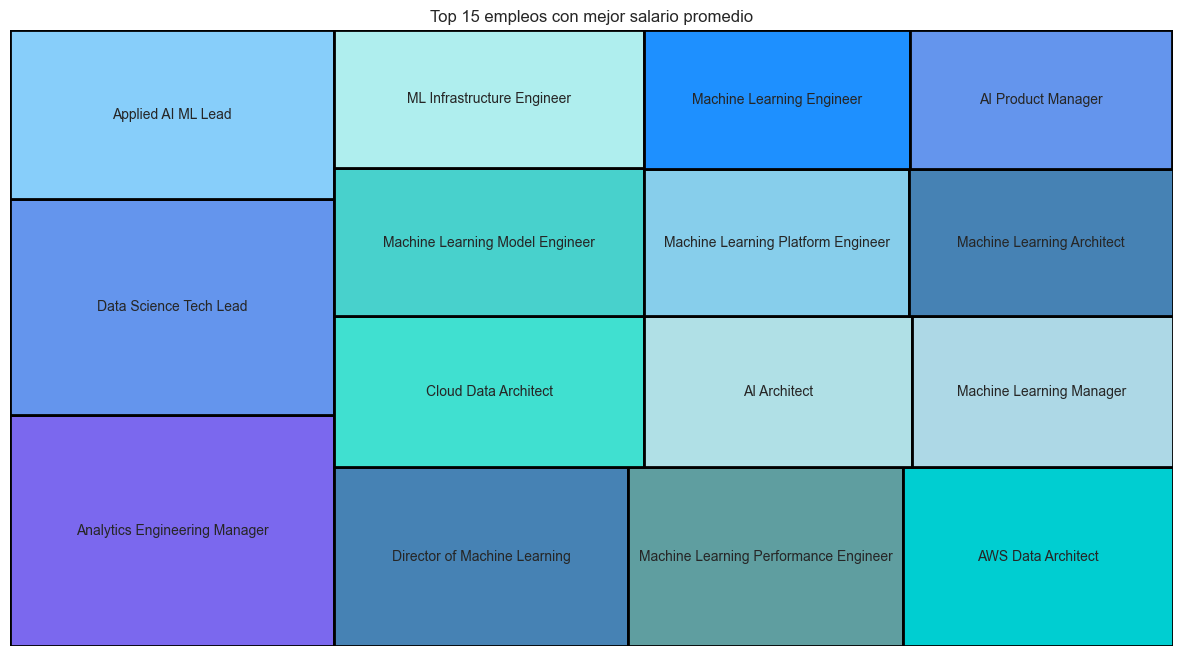

In [58]:
salary_rank = jobs.groupby('job_title')[['salary_in_usd']].mean()
salary_rank = salary_rank.reset_index()
salary_rank = salary_rank.sort_values(by='salary_in_usd', ascending=False).head(15)
salary_rank = salary_rank.reset_index().drop(columns="index")

salary_rank['salary_in_usd'] = salary_rank['salary_in_usd'].round()

plt.figure(figsize=(15,8))

squarify.plot(sizes=salary_rank['salary_in_usd'], label=salary_rank['job_title'], alpha=1, linewidth=2, edgecolor='black' ,color=['#7B68EE', '#6495ED', '#87CEFA', '#4682B4', '#5F9EA0', '#00CED1', '#40E0D0', '#48D1CC', '#AFEEEE', '#B0E0E6', '#ADD8E6', '#87CEEB', '#4682B4', '#1E90FF', '#6495ED'])

plt.axis('off')
plt.title('Top 15 empleos con mejor salario promedio')


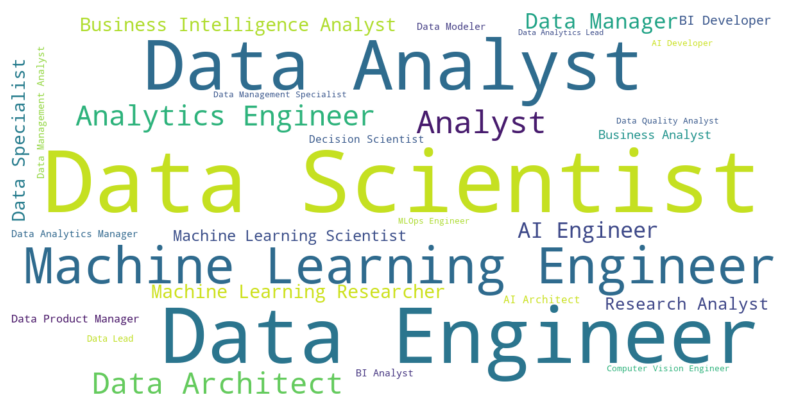

In [73]:
job_counts = jobs['job_title'].value_counts().head(30)

# Create a WordCloud object
wordcloud = WordCloud(width=1200, height=600, background_color='white', colormap='viridis').generate_from_frequencies(job_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()